In [1]:
!pip install mlxtend missingno seaborn xgboost catboost lightgbm

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/PyTorch-1.8/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from utils import *

In [3]:
# 初步加载数据集，进行初步探索
df = pd.read_csv('./liver_cirrhosis.csv',delimiter=',')
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


当前数据集中所有的列为：['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
当前数据集中，列的数量为：19
当前构造的多图布局的形状为：(5, 4)
***当前获取到了第1个列，其名称为：N_Days
***当前列：N_Days要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：Status
***当前列：Status要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：Drug
***当前列：Drug要绘制的多图布局子区域的位置为：(0, 2)
***当前获取到了第4个列，其名称为：Age
***当前列：Age要绘制的多图布局子区域的位置为：(0, 3)
***当前获取到了第5个列，其名称为：Sex
***当前列：Sex要绘制的多图布局子区域的位置为：(1, 0)
***当前获取到了第6个列，其名称为：Ascites
***当前列：Ascites要绘制的多图布局子区域的位置为：(1, 1)
***当前获取到了第7个列，其名称为：Hepatomegaly
***当前列：Hepatomegaly要绘制的多图布局子区域的位置为：(1, 2)
***当前获取到了第8个列，其名称为：Spiders
***当前列：Spiders要绘制的多图布局子区域的位置为：(1, 3)
***当前获取到了第9个列，其名称为：Edema
***当前列：Edema要绘制的多图布局子区域的位置为：(2, 0)
***当前获取到了第10个列，其名称为：Bilirubin
***当前列：Bilirubin要绘制的多图布局子区域的位置为：(2, 1)
***当前获取到了第11个列，其名称为：Cholesterol
***当前列：Cholesterol要绘制的多图布局子区域的位置为：(2, 2)
***当前获取到了第12个列，其名称为：Albumin
***当前列：Album

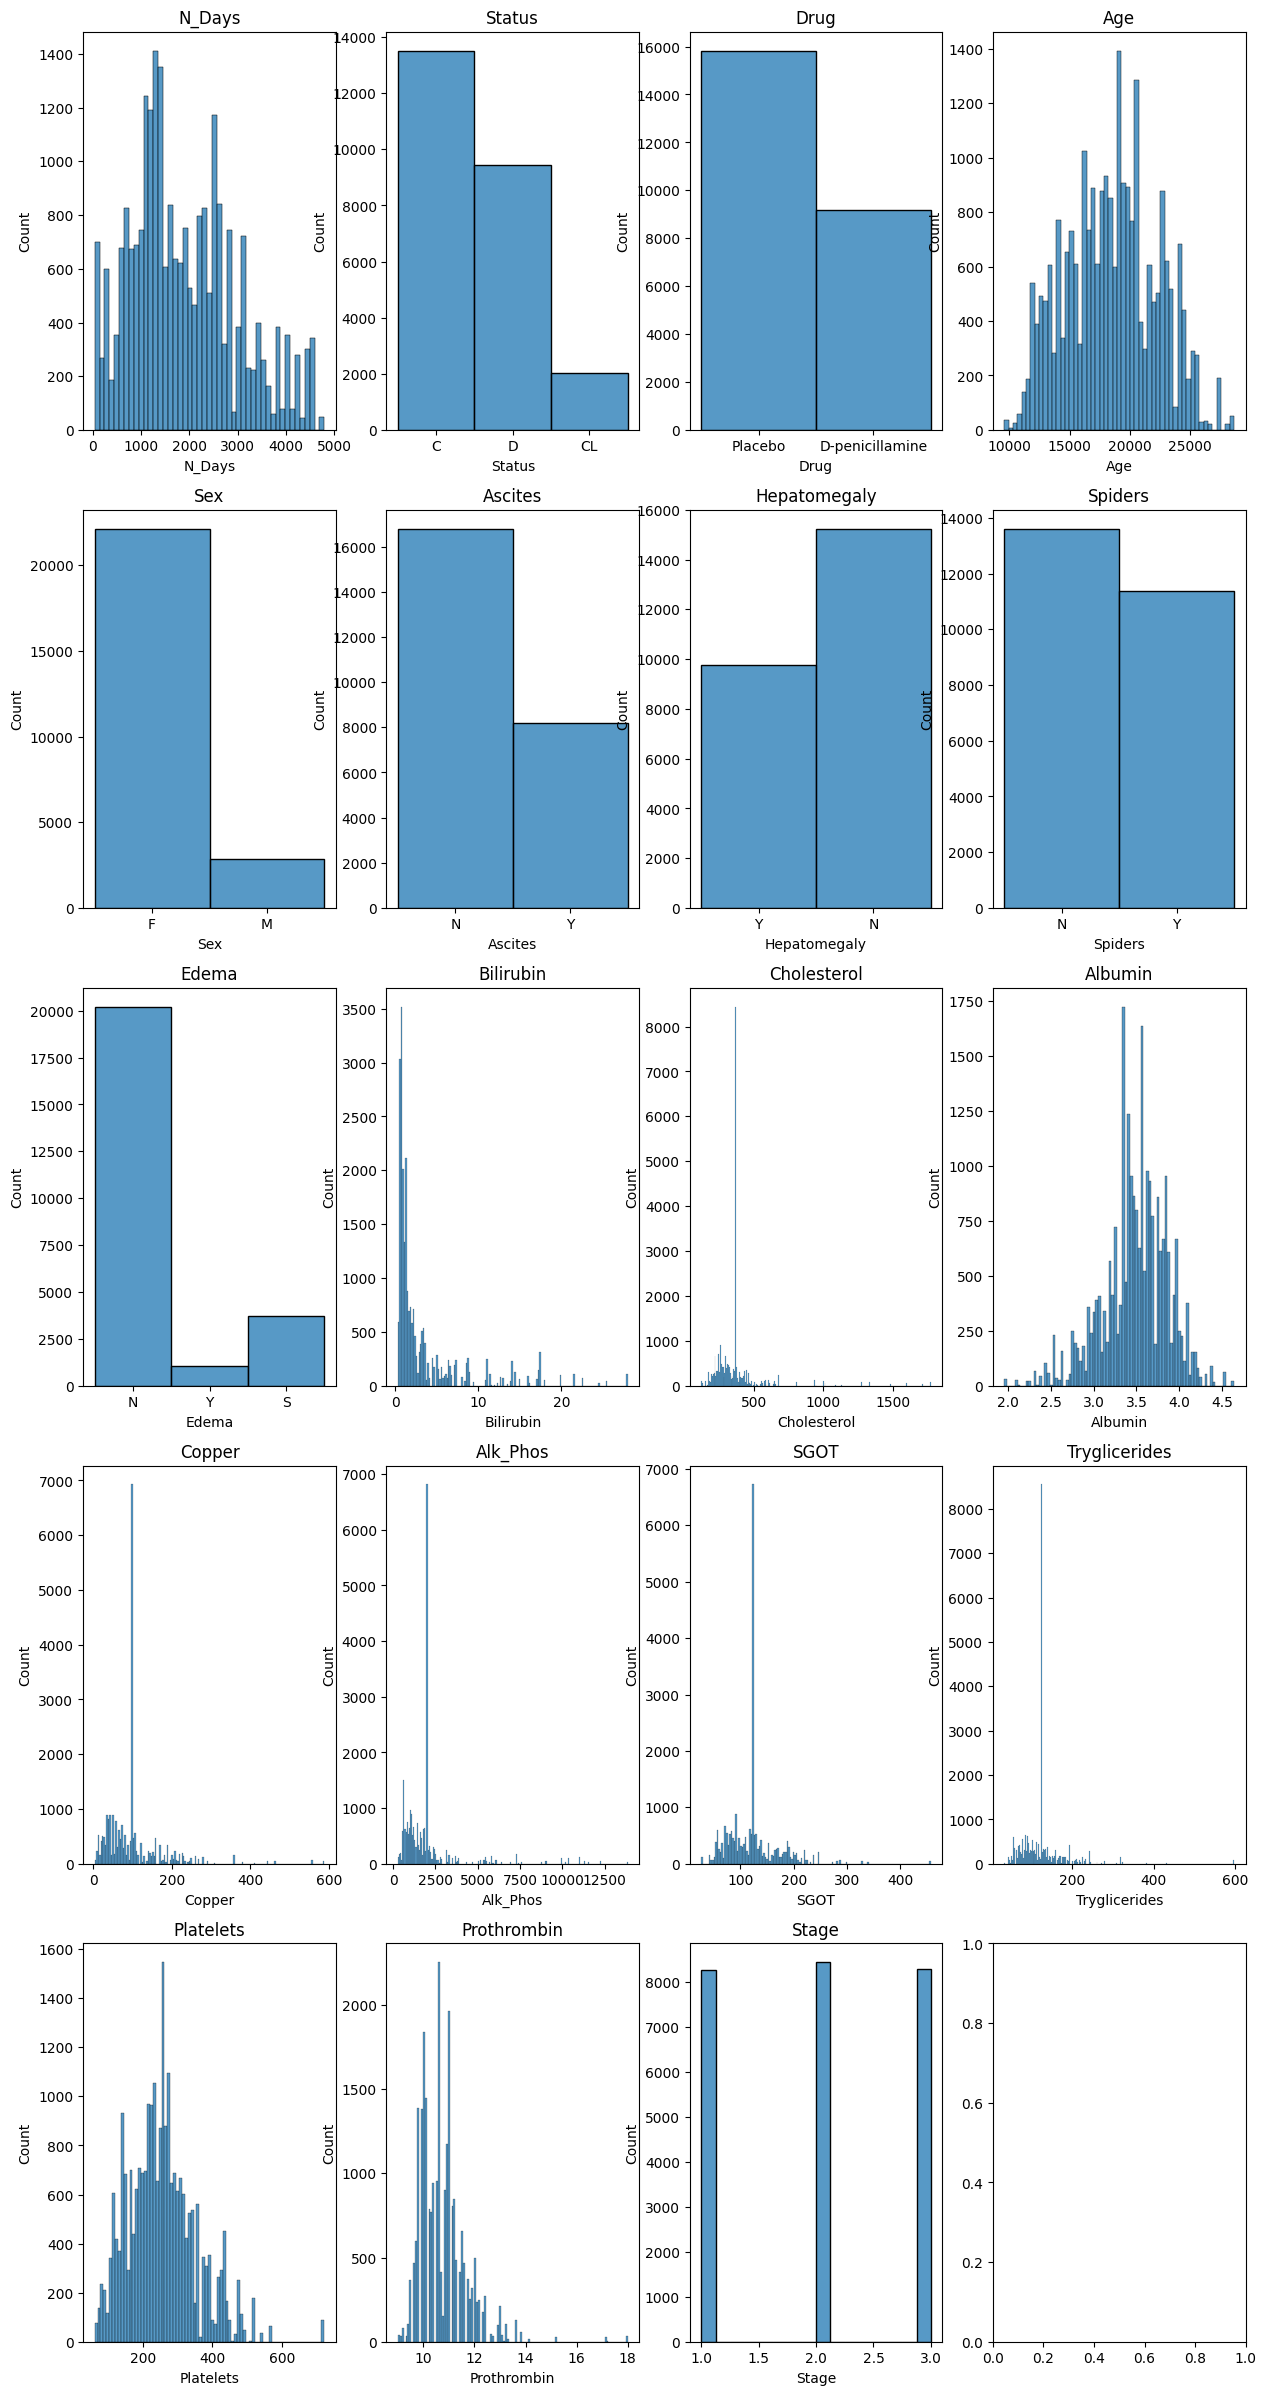

In [4]:
# 对数据集各个特征列绘制特征取值分布直方图
getHist(df,4)

In [5]:
# 通过对上述可视化结果的分析，我们总结出以下的特征为类别型特征，以下的特征为数值型特征
num_features = ['N_Days','Age','Bilirubin', 'Cholesterol', 'Albumin','Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
classes_features = ['Status', 'Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

对于当前数据集，总计：25000行，11列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
N_Days,int64,False,0,0.0,41.00,4795.00,1080.00,1680.000000,2576.000000,1887.117040,1091.690918
Age,int64,False,0,0.0,9598.00,28650.00,15694.00,18499.000000,20955.000000,18495.877080,3737.596616
Bilirubin,float64,False,0,0.0,0.30,28.00,0.80,1.300000,3.400000,3.402644,4.707491
Cholesterol,float64,False,0,0.0,120.00,1775.00,275.00,369.510563,369.510563,372.331471,193.668452
Albumin,float64,False,0,0.0,1.96,4.64,3.29,3.510000,3.750000,3.486578,0.380488
Copper,float64,False,0,0.0,4.00,588.00,52.00,97.648387,107.000000,100.184663,73.184840
Alk_Phos,float64,False,0,0.0,289.00,13862.40,1032.00,1828.000000,1982.655769,1995.675597,1798.885660
SGOT,float64,False,0,0.0,26.35,457.25,92.00,122.556346,134.850000,123.166345,47.747616
Tryglicerides,float64,False,0,0.0,33.00,598.00,92.00,124.702128,127.000000,123.822548,52.786350
Platelets,float64,False,0,0.0,62.00,721.00,189.00,251.000000,311.000000,256.007337,98.679006


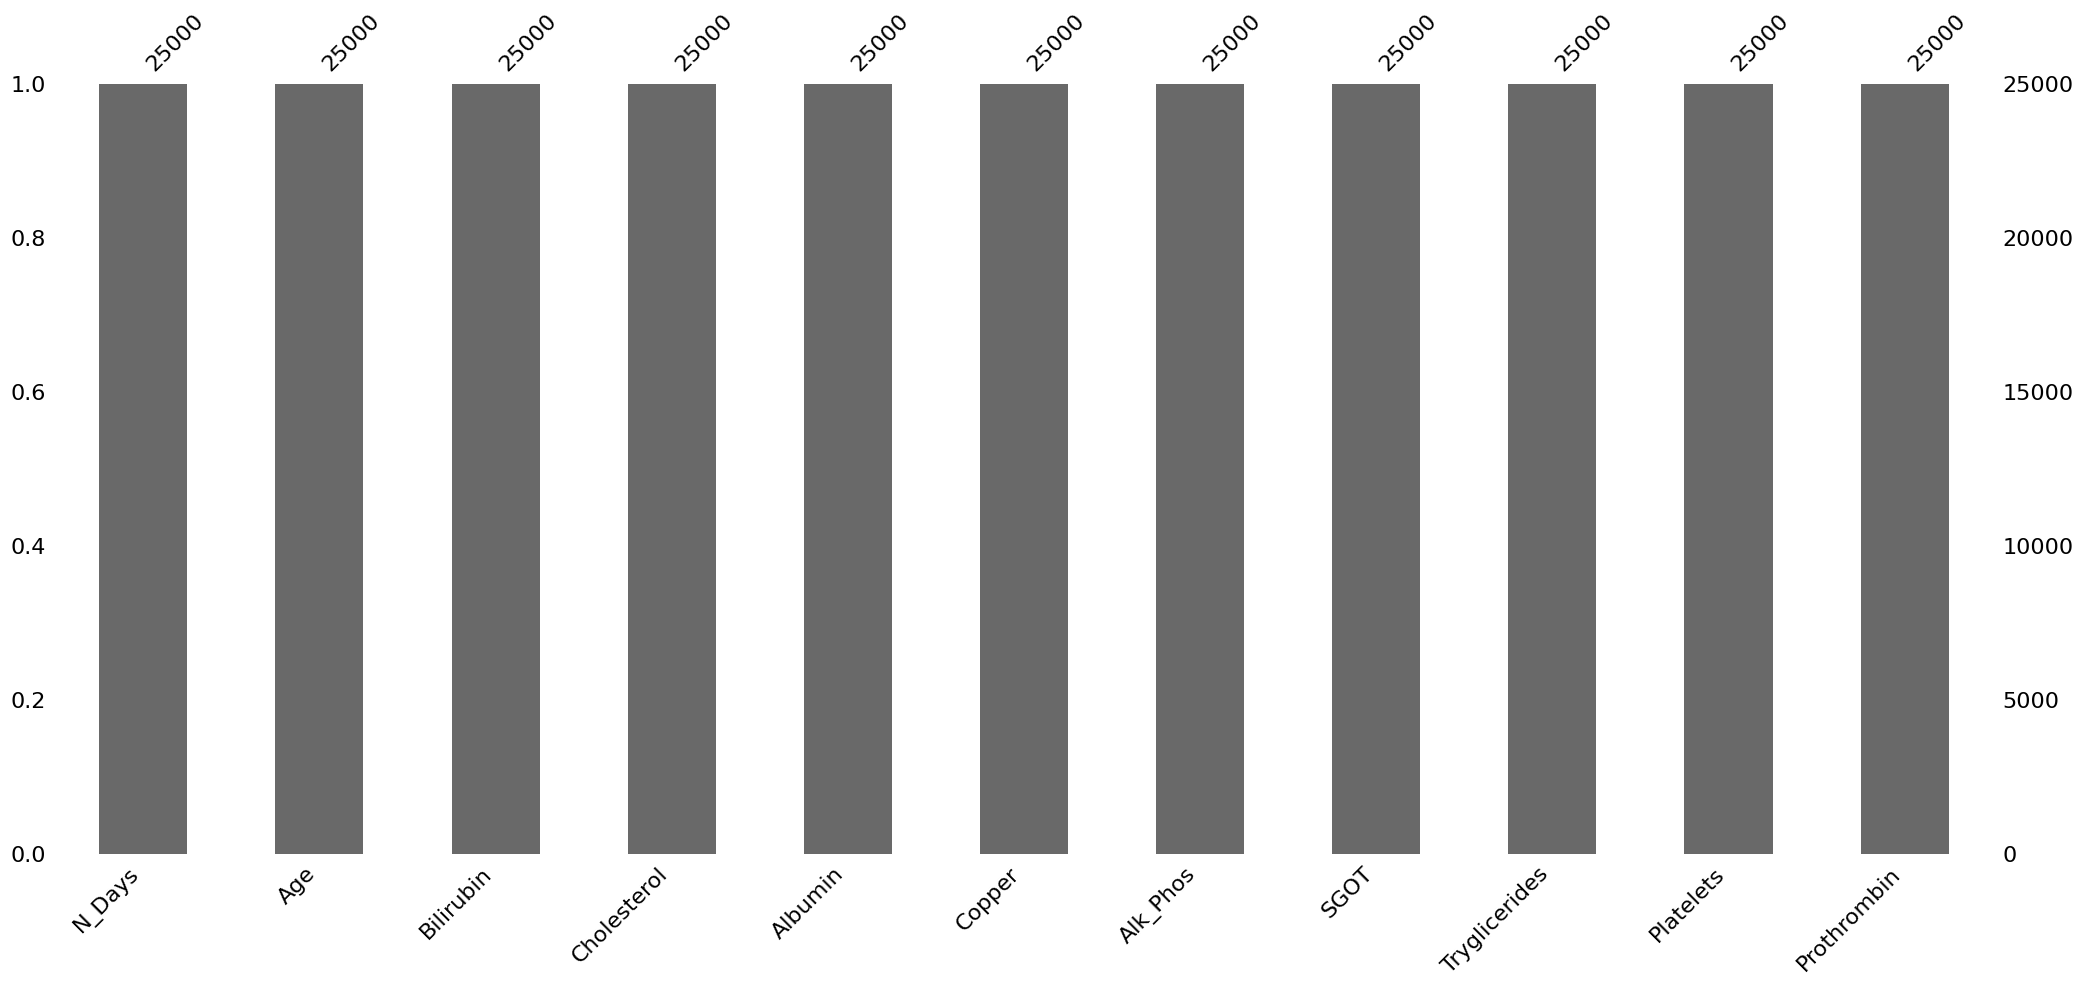

In [6]:
# 先检测数值型连续特征的缺失值分布情况
check_missing_value(df[num_features],feature_classes='number')

对于当前数据集，总计：25000行，7列
开始绘制缺失值分布直方图...


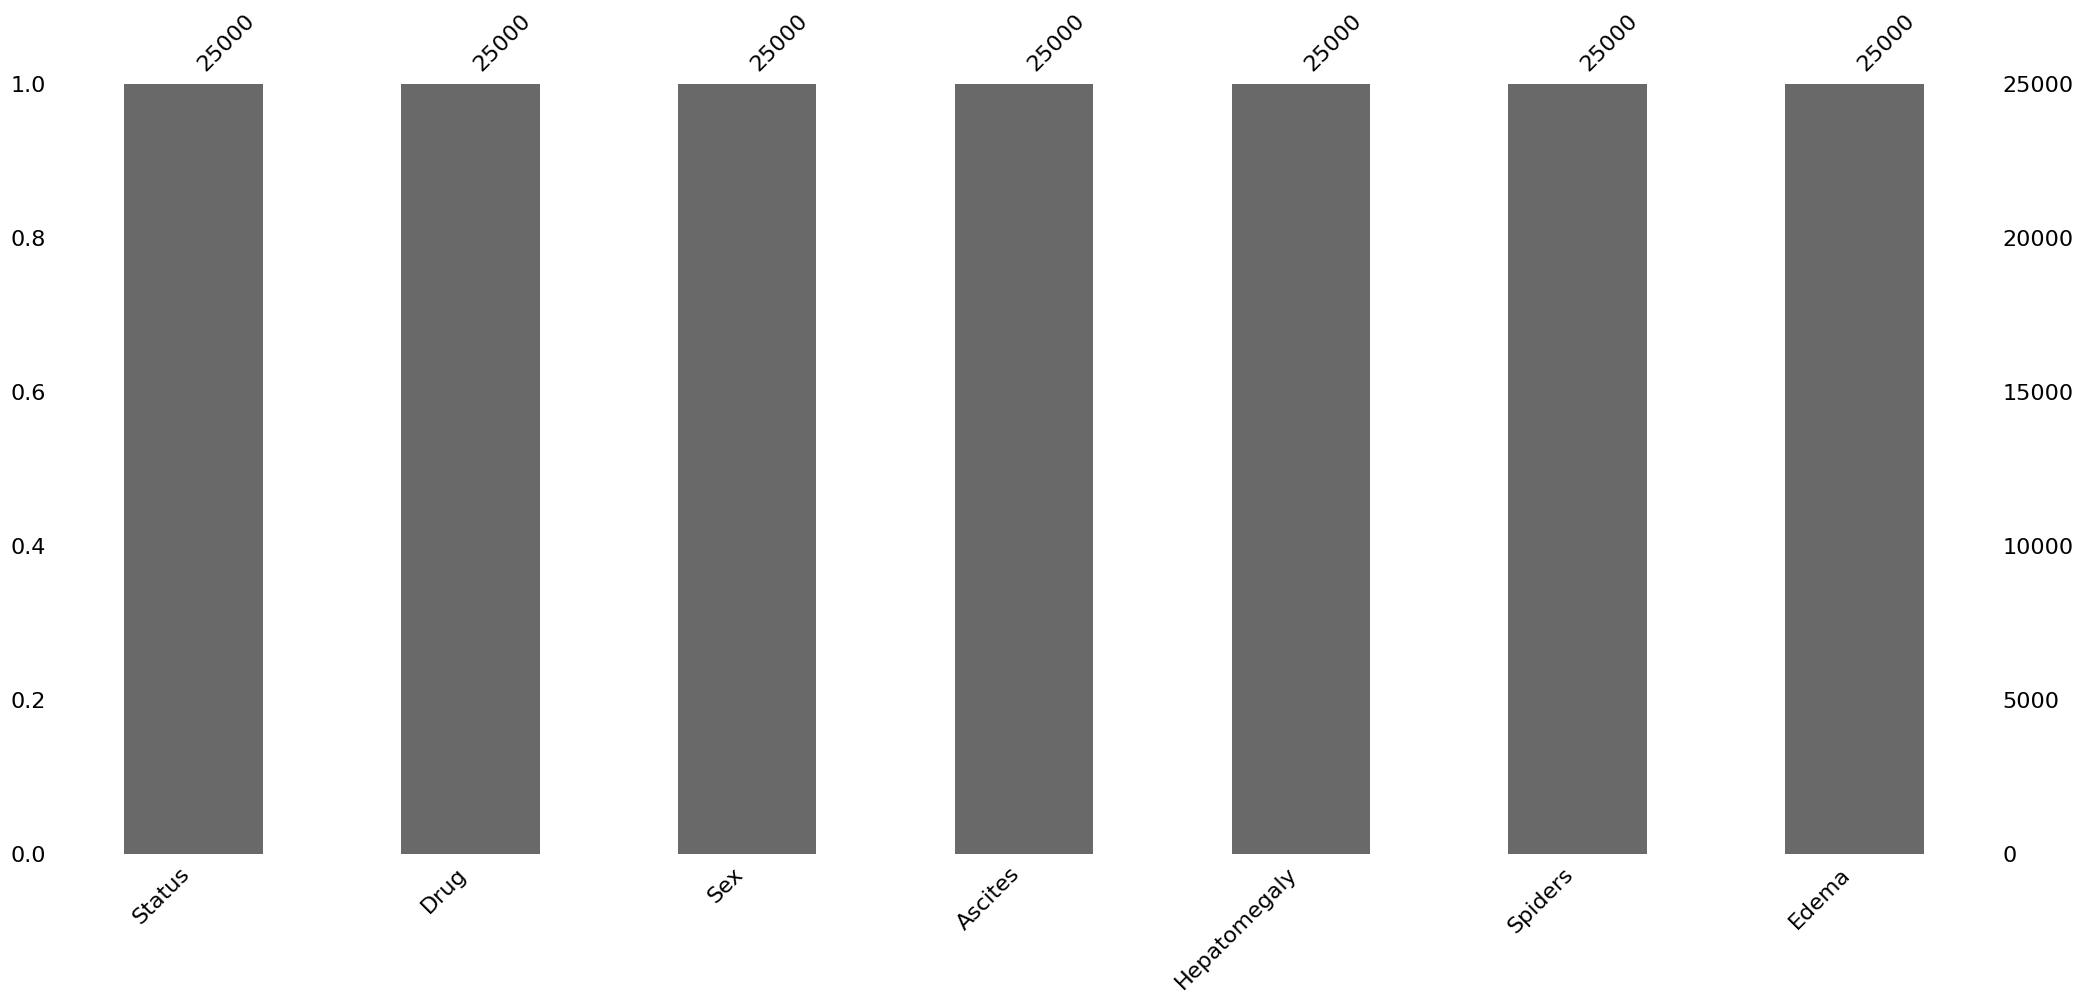

In [7]:
# 再对类别型离散特征做缺失值分布检测
check_missing_value(df[classes_features],feature_classes='classes')

当前数据集中所有的列为：['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
当前数据集中，列的数量为：18
当前构造的多图布局的形状为：(5, 4)
***当前获取到了第1个列，其名称为：N_Days
***当前列：N_Days要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：Status
***当前列：Status要绘制的多图布局子区域的位置为：(0, 1)


ValueError: could not convert string to float: 'C'

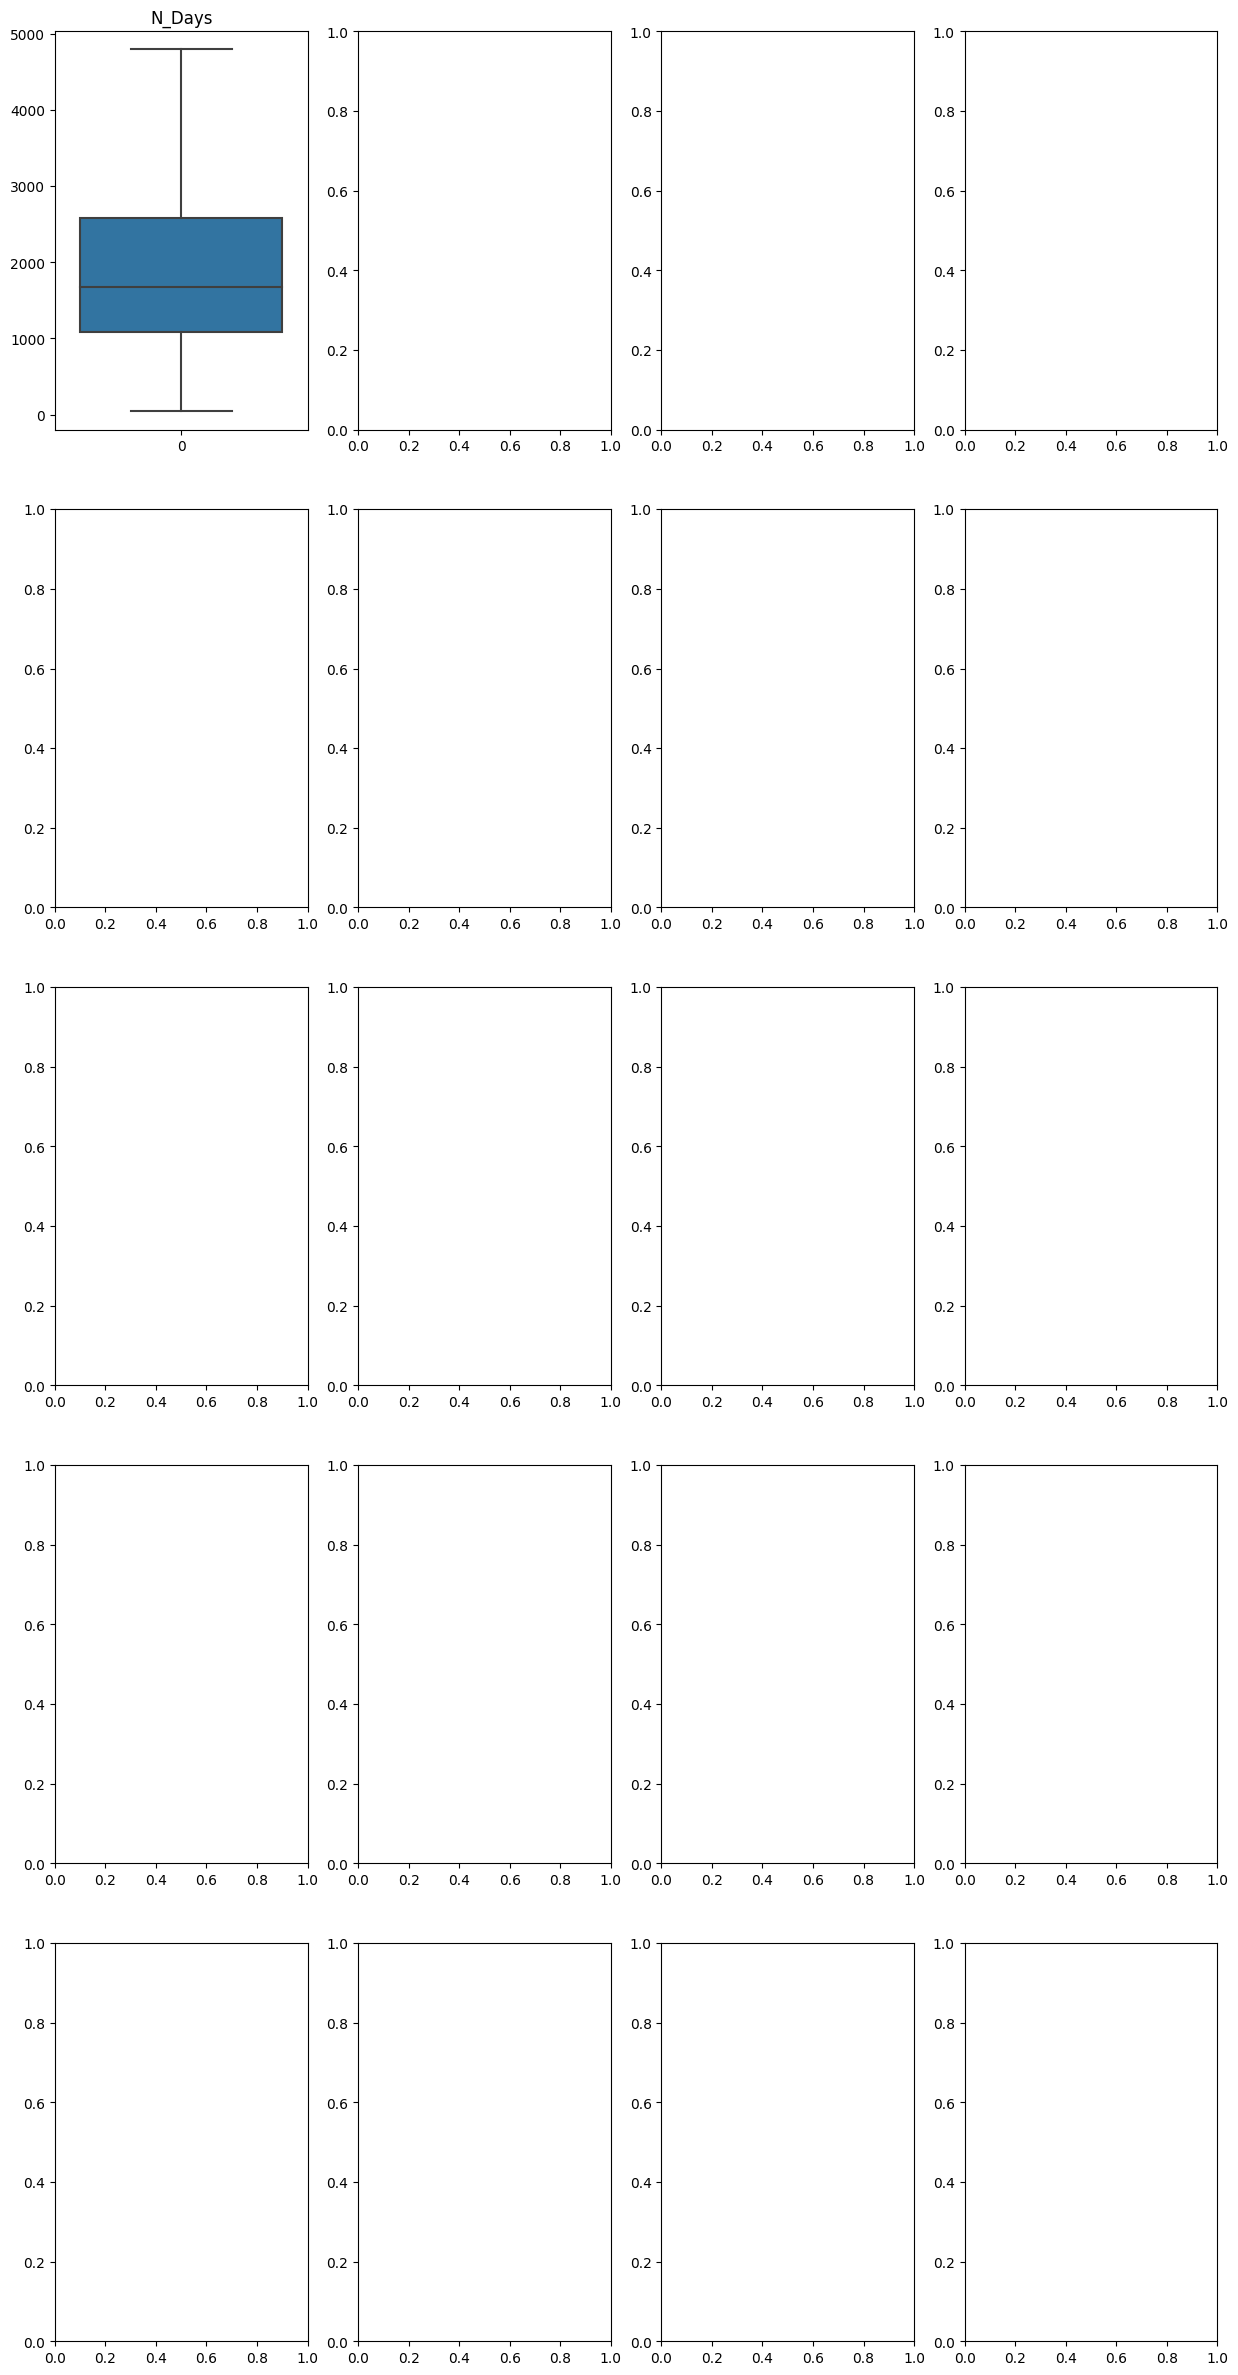

In [8]:
# 异常值检测阶段

# 先绘制各个特征列箱线图
check_except_value(df[df.columns[df.columns != 'Stage']],4)

In [9]:
# 在我们尝试进行异常值检测的过程中，我们发现：对于某些当下取值为非数值型的特征，直接报错了；
# 这也就意味着现在还不能直接做异常值处理，先对特征做编码及缩放，统一转换为数值型取值的连续型特征及类别型特征后，再继续做异常值检测

In [10]:
# 类别型特征先做特征编码
for feature in classes_features:
    df[feature] = encoder_feature(df[feature])
df[classes_features]

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,0,1,0,0,1,0,0
1,0,1,1,1,0,1,0
2,0,1,0,0,0,0,0
3,2,1,0,0,0,0,0
4,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...
24995,2,0,0,0,0,0,0
24996,2,0,0,0,0,0,0
24997,2,0,0,0,1,1,2
24998,0,0,0,0,1,0,0


In [11]:
# 标签同步也完成一下特征编码
df['Stage'] = encoder_feature(df['Stage'])
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,0
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,1
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,1
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,1
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24996,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24997,971,2,0,16736,0,0,1,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,2
24998,3707,0,0,16990,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,1


In [12]:
# 对数值型连续特征做归一化，统一量纲
for feature in num_features:
    df[feature] = normalization_feature(np.array(df[feature]).reshape(-1,1),models=MinMaxScaler)
df[num_features]

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0.458561,0.467195,0.007220,0.017523,0.776119,0.381849,0.022765,0.061151,0.042478,0.294385,0.100000
1,0.250105,0.531493,0.007220,0.059819,0.735075,0.030822,0.027554,0.043282,0.074336,0.239757,0.200000
2,0.871477,0.117625,0.007220,0.120846,0.589552,0.080479,0.070285,0.223022,0.083186,0.247344,0.111111
3,0.431005,0.360540,0.014440,0.081571,0.664179,0.032534,0.054150,0.118705,0.044248,0.135053,0.133333
4,0.434161,0.635156,0.057762,0.221148,0.589552,0.119863,0.056213,0.190647,0.134513,0.135053,0.277778
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.745267,0.735566,0.018051,0.067069,0.712687,0.289384,0.642492,0.235229,0.111504,0.353566,0.222222
24996,0.745267,0.735566,0.018051,0.067069,0.712687,0.289384,0.642492,0.235229,0.111504,0.353566,0.222222
24997,0.195625,0.374659,0.173285,0.150762,0.473881,0.023973,0.036910,0.356115,0.162305,0.063733,0.444444
24998,0.771140,0.387991,0.018051,0.117825,0.850746,0.015411,0.099312,0.334532,0.065487,0.552352,0.211111


当前数据集中所有的列为：['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
当前数据集中，列的数量为：11
当前构造的多图布局的形状为：(3, 4)
***当前获取到了第1个列，其名称为：N_Days
***当前列：N_Days要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：Age
***当前列：Age要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：Bilirubin
***当前列：Bilirubin要绘制的多图布局子区域的位置为：(0, 2)
***当前获取到了第4个列，其名称为：Cholesterol
***当前列：Cholesterol要绘制的多图布局子区域的位置为：(0, 3)
***当前获取到了第5个列，其名称为：Albumin
***当前列：Albumin要绘制的多图布局子区域的位置为：(1, 0)
***当前获取到了第6个列，其名称为：Copper
***当前列：Copper要绘制的多图布局子区域的位置为：(1, 1)
***当前获取到了第7个列，其名称为：Alk_Phos
***当前列：Alk_Phos要绘制的多图布局子区域的位置为：(1, 2)
***当前获取到了第8个列，其名称为：SGOT
***当前列：SGOT要绘制的多图布局子区域的位置为：(1, 3)
***当前获取到了第9个列，其名称为：Tryglicerides
***当前列：Tryglicerides要绘制的多图布局子区域的位置为：(2, 0)
***当前获取到了第10个列，其名称为：Platelets
***当前列：Platelets要绘制的多图布局子区域的位置为：(2, 1)
***当前获取到了第11个列，其名称为：Prothrombin
***当前列：Prothrombin要绘制的多图布局子区域的位置为：(2, 2)


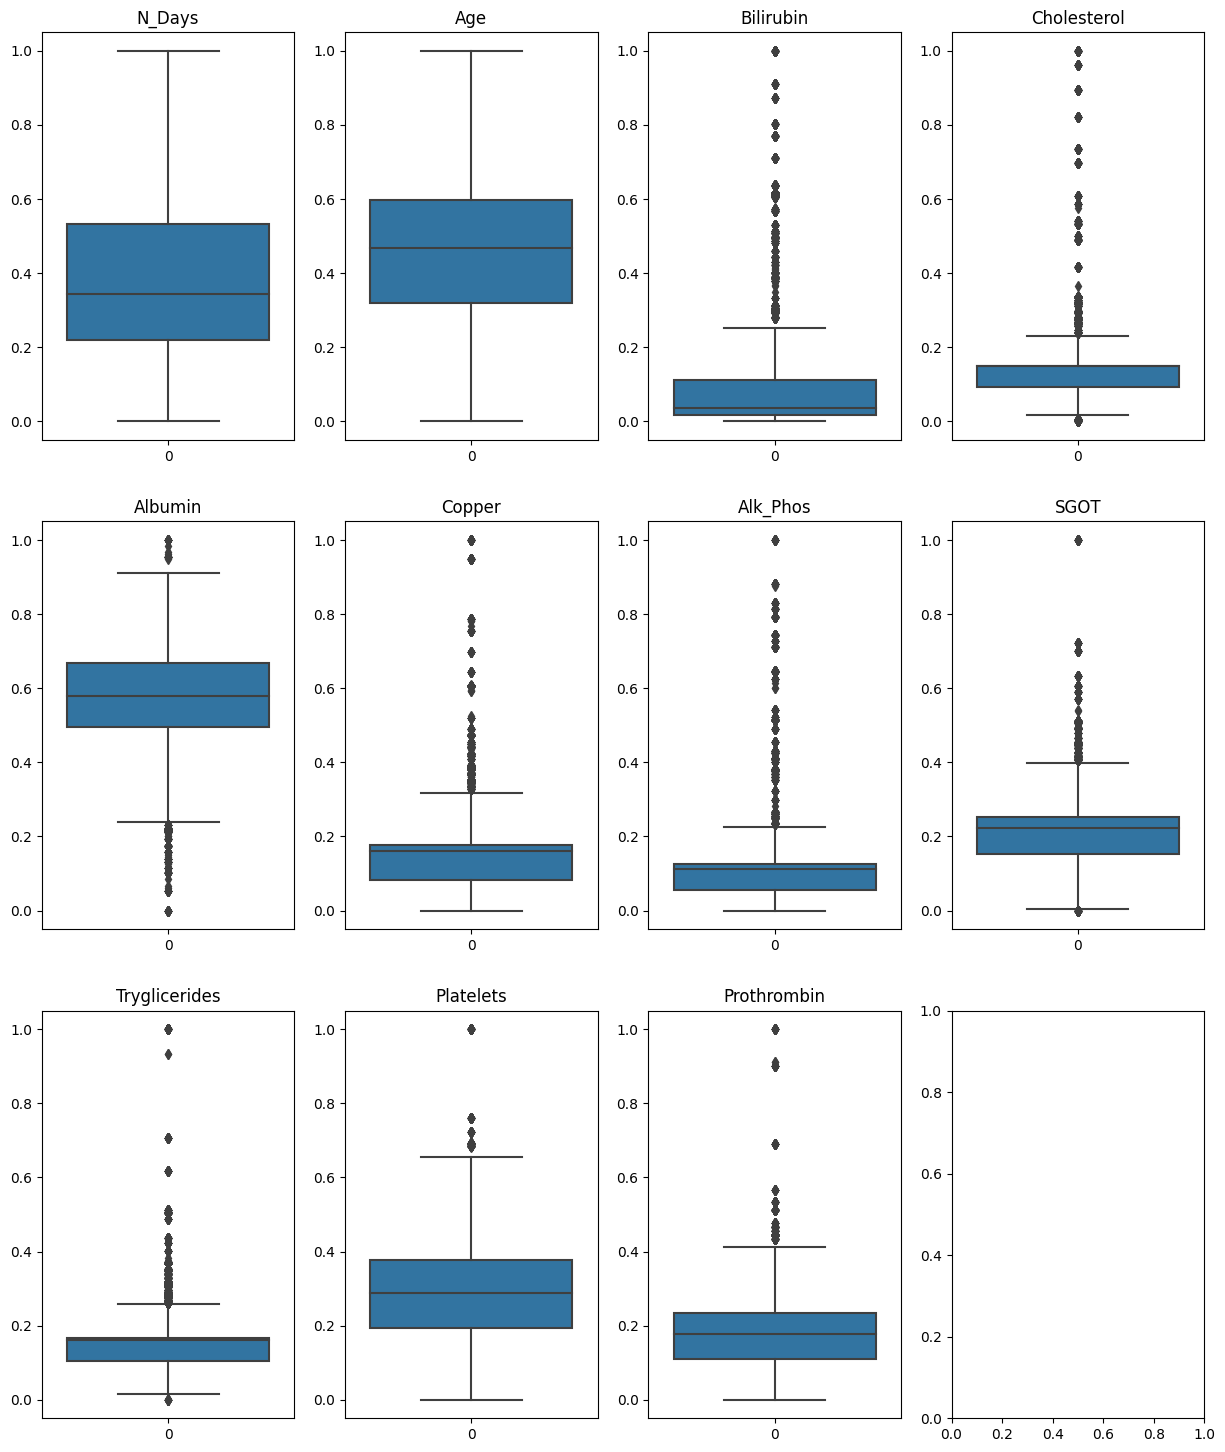

In [13]:
# 先绘制各个特征列箱线图
check_except_value(df[num_features],4)

In [14]:
# 经过检测发现：各个数值型连续特征存在较多异常值，则将其替换
df[num_features] = check_and_replace_except_value(df[num_features])



特征列：Bilirubin，检测到了一个异常值：0.44404332129963897
特征列：Bilirubin，检测到了一个异常值：0.5740072202166064
特征列：Bilirubin，检测到了一个异常值：0.4981949458483755
特征列：Bilirubin，检测到了一个异常值：0.49458483754512633
特征列：Bilirubin，检测到了一个异常值：0.30324909747292417
特征列：Bilirubin，检测到了一个异常值：0.5306859205776173
特征列：Bilirubin，检测到了一个异常值：0.7111913357400722
特征列：Bilirubin，检测到了一个异常值：0.296028880866426
特征列：Bilirubin，检测到了一个异常值：0.5090252707581228
特征列：Bilirubin，检测到了一个异常值：0.6389891696750902
特征列：Bilirubin，检测到了一个异常值：0.29241877256317694
特征列：Bilirubin，检测到了一个异常值：0.4584837545126354
特征列：Bilirubin，检测到了一个异常值：0.6101083032490974
特征列：Bilirubin，检测到了一个异常值：0.3898916967509025
特征列：Bilirubin，检测到了一个异常值：0.7689530685920578
特征列：Bilirubin，检测到了一个异常值：0.6064981949458483
特征列：Bilirubin，检测到了一个异常值：0.6173285198555956
特征列：Bilirubin，检测到了一个异常值：0.8014440433212996
特征列：Bilirubin，检测到了一个异常值：0.3862815884476534
特征列：Bilirubin，检测到了一个异常值：0.9999999999999999
特征列：Bilirubin，检测到了一个异常值：0.3790613718411553
特征列：Bilirubin，检测到了一个异常值：0.5667870036101083
特征列：Bilirubin，检测到了一个异常值：0.9097472924187725
特征列：Bi

/home/ma-user/work/utils.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(value,desc['50%'])


特征列：SGOT，检测到了一个异常值：0.0
特征列：SGOT，检测到了一个异常值：0.42446043165467623
特征列：SGOT，检测到了一个异常值：0.7014388489208634
特征列：SGOT，检测到了一个异常值：0.4892086330935252
特征列：SGOT，检测到了一个异常值：0.40647482014388486
特征列：SGOT，检测到了一个异常值：0.41459735437456485
特征列：SGOT，检测到了一个异常值：1.0
特征列：SGOT，检测到了一个异常值：0.41007194244604317
特征列：SGOT，检测到了一个异常值：0.42805755395683454
特征列：SGOT，检测到了一个异常值：0.5899280575539569
特征列：SGOT，检测到了一个异常值：0.5719424460431656
特征列：SGOT，检测到了一个异常值：0.45323741007194246
特征列：SGOT，检测到了一个异常值：0.7232536551404039
特征列：SGOT，检测到了一个异常值：0.45377117660710137
特征列：SGOT，检测到了一个异常值：0.6072174518449757
特征列：SGOT，检测到了一个异常值：0.4387328846600139
特征列：SGOT，检测到了一个异常值：0.5422371779995359
特征列：SGOT，检测到了一个异常值：0.5375957298677188
特征列：SGOT，检测到了一个异常值：0.456370387560919

特征列：Tryglicerides，检测到了一个异常值：0.2867256637168141
特征列：Tryglicerides，检测到了一个异常值：0.31150442477876106
特征列：Tryglicerides，检测到了一个异常值：0.2672566371681416
特征列：Tryglicerides，检测到了一个异常值：0.504424778761062
特征列：Tryglicerides，检测到了一个异常值：0.36991150442477877
特征列：Tryglicerides，检测到了一个异常值：0.48849557522123893
特征列：Tryglicerides

当前数据集中所有的列为：['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
当前数据集中，列的数量为：11
当前构造的多图布局的形状为：(3, 4)
***当前获取到了第1个列，其名称为：N_Days
***当前列：N_Days要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：Age
***当前列：Age要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：Bilirubin
***当前列：Bilirubin要绘制的多图布局子区域的位置为：(0, 2)
***当前获取到了第4个列，其名称为：Cholesterol
***当前列：Cholesterol要绘制的多图布局子区域的位置为：(0, 3)
***当前获取到了第5个列，其名称为：Albumin
***当前列：Albumin要绘制的多图布局子区域的位置为：(1, 0)
***当前获取到了第6个列，其名称为：Copper
***当前列：Copper要绘制的多图布局子区域的位置为：(1, 1)
***当前获取到了第7个列，其名称为：Alk_Phos
***当前列：Alk_Phos要绘制的多图布局子区域的位置为：(1, 2)
***当前获取到了第8个列，其名称为：SGOT
***当前列：SGOT要绘制的多图布局子区域的位置为：(1, 3)
***当前获取到了第9个列，其名称为：Tryglicerides
***当前列：Tryglicerides要绘制的多图布局子区域的位置为：(2, 0)
***当前获取到了第10个列，其名称为：Platelets
***当前列：Platelets要绘制的多图布局子区域的位置为：(2, 1)
***当前获取到了第11个列，其名称为：Prothrombin
***当前列：Prothrombin要绘制的多图布局子区域的位置为：(2, 2)


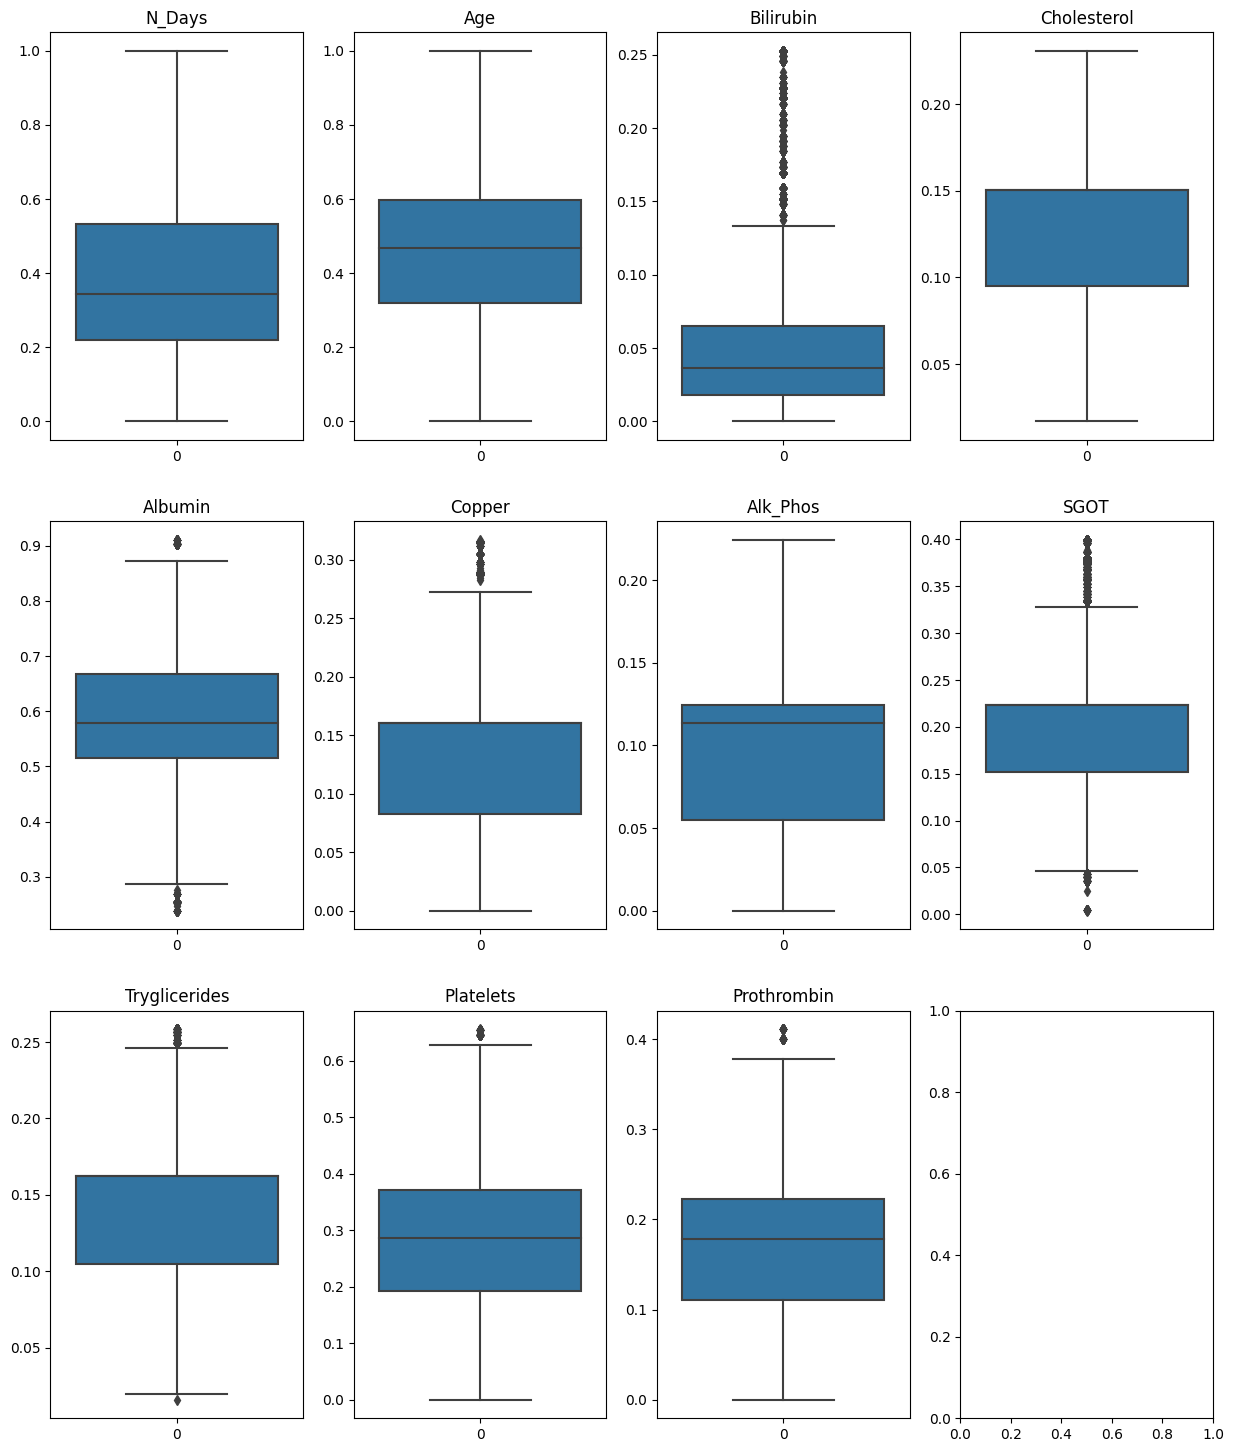

In [15]:
# 再次绘制各个特征列箱线图，检测异常值是否替换大部分
check_except_value(df[num_features],4)

In [16]:
# 保存第一阶段预处理结果的数据集 - 如果后续操作发现数据的某些预处理环节还需再进行，则直接基于当前版本的数据继续处理即可；
df.to_csv('./liver_dataTmp1.csv',sep=',')

In [4]:
df = pd.read_csv('./liver_dataTmp1.csv',delimiter=',')

In [5]:
# 模型选型环节
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score

# 完成数据集划分
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=123)

/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/pkg_resources/__init__.py:126: PkgResourcesDeprecationWarning: 2.1.0.5d9c87c8 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [ ]:
# 实现模型选型
def modelSelections(Xtrain,Ytrain,*args,**kwargs):
    '''
    模型选型函数
    :params Xtrain:训练集数据
    :params Ytrain:训练集标签
    调用该函数时，任何一个参与模型选型的基模型直接使用多余的位置实参进行传递；任何一个参与模型选型的模型的名称直接使用多余的关键字实参进行传递；
    '''
    
    # 收集到的所有参与模型选型的基模型，其中random_state已固定
    model_list = list(args)
    
    # 收集到的所有参与模型选型的基模型的名称，方便后续输出
    modelName_list = list(kwargs.values())
    
    
    # 准备一个保存所有模型交叉验证均值评分的数组
    scores = []
    # 遍历每一个基模型，开始做模型选型过程
    for model_name,model_ in zip(modelName_list,model_list):
        
        # 十折交叉验证，取均值结果
        cv_score = cross_val_score(model_,Xtrain,Ytrain,cv=10).mean()
        
        # 添加
        scores.append(cv_score)
        
        # # logs输出
        # print('model:{}  --  cv_score(mean):{}'.format(model_name,cv_score))
    
    print()
    print()
    print()
    
    for log in [*zip(modelName_list,scores)]:
        print('model:{}  --  cv_score(mean):{}'.format(log[0],log[1]))
        
    return model_list[scores.index(max(scores))]
        

    
best_model = modelSelections(
    Xtrain,
    Ytrain,
    RandomForestClassifier(random_state=1234),
    AdaBoostClassifier(random_state=1234),
    GradientBoostingClassifier(random_state=1234),
    XGBClassifier(random_state=1234),
    LGBMClassifier(random_state=1234),
    CatBoostClassifier(random_state=1234),
    model1='randomforest',
    model2='adaboost',
    model3='gbdt',
    model4='xgboost',
    model5='lightgbm',
    model6='catboost'
)
best_model

In [7]:
# 得出最优模型后，对该最优模型进行网格搜索
from sklearn.model_selection import GridSearchCV

In [8]:
# 准备待调优参数
params = {
    'booster':['gbtree','gblinear','dart'],
    'objective':['multi:softmax'],
    'eval_metric':['merror','mlogloss'],
    'eta':[0.01,0.1,0.3,0.5],
    'reg_lambda':[0,0.01,0.1,1],
    
}

# 准备一个xgboost
xgb = XGBClassifier()

# 准备网格搜索
grid= GridSearchCV(
    estimator=xgb, # 网格搜索的调优模型
    param_grid=params, # 网格搜索调优参数
    scoring='accuracy', # 指定网格搜索的评估指标
    cv=5,
    n_jobs=-1, # 调用所有核心参与训练
    # verbose=1 # 输出网格搜索进度和logs
)

# 开始网格搜索
grid.fit(Xtrain,Ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [9]:
# 输出模型的一组最优参数
grid.best_params_

{'booster': 'gbtree',
 'eta': 0.5,
 'eval_metric': 'merror',
 'objective': 'multi:softmax',
 'reg_lambda': 0}

In [10]:
# 得出最优模型
xgb = grid.best_estimator_

In [11]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.5,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, ...)

In [12]:
xgb.fit(Xtrain,Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.5,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, ...)

In [13]:
# 依据最优模型训练后获得测试集上的预测结果
y_pred = xgb.predict(Xtest)

In [14]:
# 评估一下准确率
accuracy_score(Ytest,y_pred)

0.9641333333333333

In [15]:
# 不满足上述准确率！继续调参，反正你不疯，我得疯！
# 传统机器学习集成算法不考虑了！直接上王炸：使用DNN全连接深度神经网络来实现，看看神经网络能否达到更好的准确率